# Data Mining on Spotify data


We have some data which contains a sample of anonymized user listening data in Spotify (from the first half of October, 2015). We'd like you to take a look into the data and possibly categorize it in insightful ways. There are two files:

end_song_sample.csv:

* <strong>ms_played</strong>:         the amount of time the user listened to this track, in milliseconds

* <strong>context</strong>:            the UI context the track was played from (e.g. playlist or artist page)

* <strong>track_id</strong>:              the random UUID for the track

* <strong>product</strong>:                the product status (e.g. free or paid)

* <strong>end_timestamp</strong>:                 the Epoch timestamp that marks the end of the listen

* <strong>user_id</strong>:                 the anonymous, random UUID of the user


user_data_sample.csv:

* <strong>gender</strong>:               the gender of the user (male or female)

* <strong>age_range</strong>:               a bucketed age of the user

* <strong>country</strong>:              the country where the user registered

* <strong>acct_age_weeks</strong>:                the age of the user's account in weeks as of Oct 14th, 2015

* <strong>user_id</strong>:               the anonymous, random UUID of the user

There are some remarks about the code and the approach selected to answer the questions which are listed here:

* The programming language is Python 2.7

* All the packages used including Pandas, numpy and matplotlib are free and accessible for everyone

* The data is recorded for about 2 weeks in October 2015

* The listening sessions are considered to be days

* There is no big difference between male or female listeners

* There are some insightful differences in user behaviour per session based on their age group and country tho

* the most active users per session are the people who just signed up


We first import all the modules used in this analysis:

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from copy import deepcopy
%matplotlib inline
plt.style.use('ggplot')

Let's load the csv files and take a look at the data:

In [32]:
users = pd.read_csv(r'C:\Udemy\DataScience\Spotify\user_data_sample.csv')
print "row, col = ", users.shape
users.head()

row, col =  (9565, 5)


,gender,age_range,country,acct_age_weeks,user_id
0,male,25 - 29,FR,329,97f47c9fba714ca68320b8a80e010a1a
1,female,45 - 54,US,178,d615ca85849d458e9a5d755ec4727e8f
2,female,18 - 24,DE,68,6c83a5bf63b74f85b106ac7e7e015a1b
3,female,30 - 34,US,8,530fcedb3f244e6f91ecb326740005eb
4,female,30 - 34,FR,42,d2ed6a815eda4f61aa346b7936d03ef7


In [33]:
songs = pd.read_csv(r'C:\Udemy\DataScience\Spotify\end_song_sample.csv')
print "row, col = ", songs.shape
songs.head()

row, col =  (1342891, 6)


,ms_played,context,track_id,product,end_timestamp,user_id
0,330962,album,2ab4f3b3a6c34fbaba95c2451b65efbd,open,1.444790e+09,a9abbb14c8544898a0e06feb94f8051e
1,7476,album,0f5f2acbcf244490948ac2e63adade73,open,1.444790e+09,a9abbb14c8544898a0e06feb94f8051e
2,227280,collection,0f4a2173eb1f4aa9b8693ad7a92fab73,open,1.444797e+09,a9abbb14c8544898a0e06feb94f8051e
3,325,playlist,affc7467b68e4dfab9d1d7b9ec8d4673,open,1.444796e+09,a9abbb14c8544898a0e06feb94f8051e
4,204196,collection,427fd37cbfe640a8a78179477c9f33d3,open,1.444799e+09,a9abbb14c8544898a0e06feb94f8051e


As expected we have a lot more records in the songs data. Each user listened to many songs and the data shows all of the user activity for each song. We can merge user info with songs data and build up data which will be used for processing:

In [34]:
data = users.merge(songs)
print "row, col = ", data.shape
data.head()

row, col =  (1342891, 10)


,gender,age_range,country,acct_age_weeks,user_id,ms_played,context,track_id,product,end_timestamp
0,male,25 - 29,FR,329,97f47c9fba714ca68320b8a80e010a1a,408000,playlist,f9105d43bf1940caa82802c97b59684f,free,1.443822e+09
1,male,25 - 29,FR,329,97f47c9fba714ca68320b8a80e010a1a,292429,playlist,558bef60e515435c9c2e64aab10c83a6,free,1.443822e+09
2,male,25 - 29,FR,329,97f47c9fba714ca68320b8a80e010a1a,359769,playlist,e8b1cd3e2956436a982a97dd76490a8d,free,1.443829e+09
3,male,25 - 29,FR,329,97f47c9fba714ca68320b8a80e010a1a,329085,playlist,f017dad7ef8e40e682523b75c07ea145,free,1.443816e+09
4,male,25 - 29,FR,329,97f47c9fba714ca68320b8a80e010a1a,337425,playlist,8d48d9cd55074b529a8cdd63ea90bce1,free,1.443826e+09


To answer the warmup question about male or female activity, we need to group the data based on gender and take a look at the users and the number of tracks they listened to:

In [35]:
genders = data.groupby(['age_range', 'gender']).agg({'track_id':[lambda x: len(np.unique(x))], 'user_id':[lambda x: len(np.unique(x))]})
genders

user_id track_id
                  <lambda> <lambda>
age_range gender                   
0 - 17    female       690    28615
          male         455    22456
18 - 24   female      1533    70818
          male        1574    75542
          unknown        7      134
25 - 29   female       736    42795
          male         914    54684
          unknown        4      101
30 - 34   female       518    30447
          male         598    42009
          unknown        2      108
35 - 44   female       598    30656
          male         734    40349
          unknown        2      240
45 - 54   female       312    16083
          male         402    24698
          unknown        2       79
55+       female       173     8744
          male         301    20661
          unknown        2      317

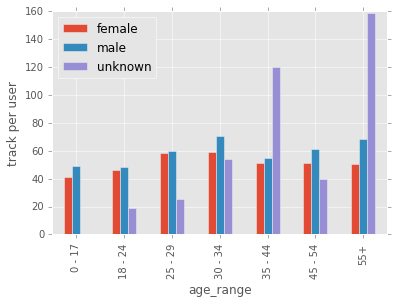

In [6]:
genders['track_per_user'] = genders.track_id/genders.user_id
genders = genders.unstack(level=-1, fill_value=0)
fig = genders.track_per_user.plot.bar()
fig.set_ylabel('track per user')
fig.legend(['female', 'male', 'unknown'], loc='best')

Male and female listeners are not very differfent in terms of average number of tracks listened per user. But, this data shows older people (55+) who have some gender identity issues listened to more tracks on average compared to male or females in the same category. Later on we will show that people with unknown gender have listened to less ms of music per session actually.   

In [36]:
played = data.groupby('gender').agg({'ms_played':[np.size, np.mean, np.median, np.std, np.sum]})
played

ms_played                                            
             size    mean  median            std          sum
gender                                                       
female     649178  128347  154087  116796.878631  83320664240
male       691479  128950  141781  123014.083621  89166774194
unknown      2234  160558  196755  122230.824521    358687857

In [37]:
played['played_per_user'] = played.ms_played['sum']/played.ms_played['size']
played['played_per_user']

gender
female     128347.948082
male       128950.805728
unknown    160558.575201
Name: played_per_user, dtype: float64

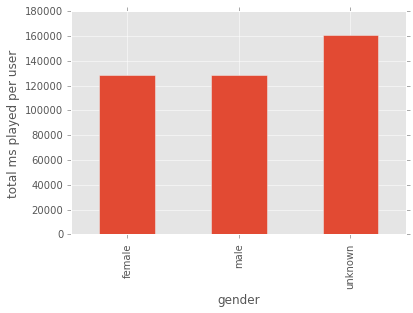

In [9]:
fig = played['played_per_user'].plot.bar()
fig.set_ylabel('total ms played per user')

This data shows that there is no big difference between male and female listeners in terms of totall ms played either. 

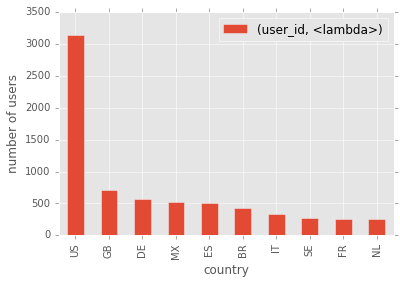

In [10]:
users_per_country = data.groupby('country').agg({'user_id':[lambda x: len(np.unique(x))]})
users_per_country.sort_values([('user_id', '<lambda>')], ascending=False, inplace=True)
fig = users_per_country.head(10).plot.bar()
fig.set_ylabel('number of users')
fig.legend()

USA has the most listeners. You guys maybe should work on Asian market also. Not many users from Asia it seems!

In this section we will work on listening sessions and analyse some user behaviour per session. The warmup is over here with no proof on gender being a factor in listening to music habits. We first need to convert the provided linux time epoch to a human-readable date time format. Then I will resample it to represent daily activities for all users. 

In [38]:
sessions = deepcopy(data)
sessions.index = pd.to_datetime(sessions.pop('end_timestamp'), unit='s')
daily_sessions = sessions.groupby(['user_id']).resample('D', convention='end').agg({'ms_played':[np.sum]})
daily_sessions.head()

ms_played
                                                     sum
user_id                          end_timestamp          
000eb8799c9344c8853e8a2b57d835ff 2015-10-04       320466
                                 2015-10-09     17149000
001b9229782940c39f311c3d5fa3bdc9 2015-10-01         1532
                                 2015-10-02         1532
                                 2015-10-06        97939

Each user might have few days of activity (sessions). But what I want to look at is the average ms played per session for all users. 

In [39]:
daily_sessions = daily_sessions.reset_index()
daily_sessions = daily_sessions.groupby('user_id').mean().reset_index()
daily_sessions.columns = [u'user_id', u'ms_played_per_session']
daily_sessions.head()

,user_id,ms_played_per_session
0,000eb8799c9344c8853e8a2b57d835ff,8.734733e+06
1,001b9229782940c39f311c3d5fa3bdc9,4.406775e+04
2,001cc057631d49ba81e30919dc12920f,8.111010e+05
3,001eacb8a417475ca5c66600c6333ebc,1.100194e+06
4,001fbc268150424e82b2af6a13b300eb,3.941133e+06


Merging that info with user info I get the data I like to play with:

In [40]:
session_user_info = daily_sessions.merge(users)
session_user_info.head()

,user_id,ms_played_per_session,gender,age_range,country,acct_age_weeks
0,000eb8799c9344c8853e8a2b57d835ff,8.734733e+06,male,25 - 29,GB,39
1,001b9229782940c39f311c3d5fa3bdc9,4.406775e+04,female,18 - 24,FR,13
2,001cc057631d49ba81e30919dc12920f,8.111010e+05,female,18 - 24,US,149
3,001eacb8a417475ca5c66600c6333ebc,1.100194e+06,female,30 - 34,MX,30
4,001fbc268150424e82b2af6a13b300eb,3.941133e+06,male,18 - 24,GB,342


First thing I want to see is the affect of age range on user activity per session. I don't expect older people to be able to keep up with teenagers when it comes to average ms played per session. Let's see:

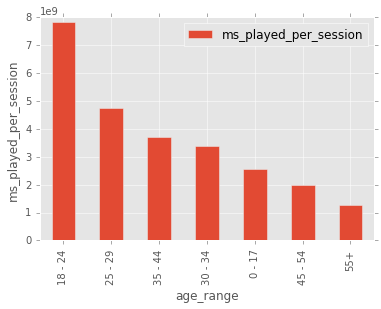

In [41]:
age_range_session = session_user_info.groupby('age_range').agg({'ms_played_per_session':sum}).sort_values('ms_played_per_session', ascending=False)
fig = age_range_session.plot.bar()
fig.set_ylabel('ms_played_per_session')

People from 18-24 are the most active in terms of average session length. 

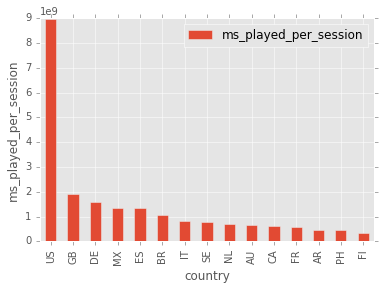

In [43]:
country_session = session_user_info.groupby('country').agg({'ms_played_per_session':sum}).sort_values('ms_played_per_session', ascending=False)
fig = country_session.head(15).plot.bar()
fig.set_ylabel('ms_played_per_session')

We showed before that USA has the most number of users. This shows USA has also the most active users which makes sense. Your database on other languages is not as good as English songs. 

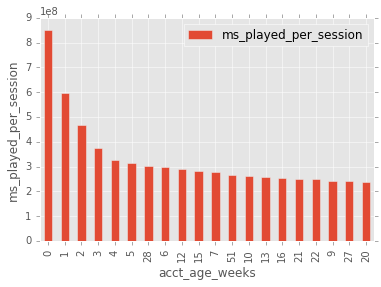

In [44]:
account_session = session_user_info.groupby('acct_age_weeks').agg({'ms_played_per_session':sum}).sort_values('ms_played_per_session', ascending=False)
fig = account_session.head(20).plot.bar()
fig.set_ylabel('ms_played_per_session')

This shows the people who just signed up are the most active which shows that they are in "discovering" mode. If you manage to suggest good songs for them you might win their heart!

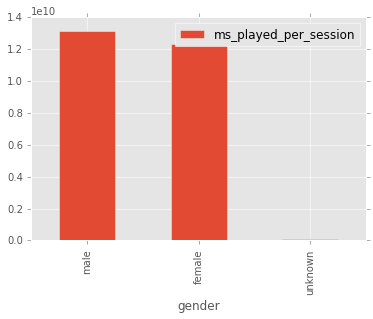

In [45]:
gender_session = session_user_info.groupby('gender').agg({'ms_played_per_session':sum}).sort_values('ms_played_per_session', ascending=False)
gender_session.plot.bar()

And finally we come back to our favorite topic: gender! This data shows male and female listeners are not very different in terms of average activity per session either! And people with unknown gender identity are much less active compared to males and females despite the fact that some of them (older) listened to many songs. Maybe looking for a song they listened when they were younger. But in either case they are just outliers in our eyes. 